# Visualize Active Learning

In this example, we demonstrate the GP fitting process on a 1D function and visualize the active learning function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import alabi
from alabi.core import SurrogateModel
import alabi.utility as ut

# Remove matplotlib background
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['savefig.facecolor'] = 'none'

In [11]:
def test1d_fn(theta):
    theta = np.asarray(theta)
    return -np.sin(3*theta) - theta**2 + 0.7*theta

# domain of the function
bounds = [(-2,3)]

def plot_current_gp(sm, save_frame=False, frame_dir="frames", iteration=0):
    # Clear any existing plots to prevent memory buildup
    plt.clf()  # Clear current figure
    plt.cla()  # Clear current axes
    
    xgrid = np.arange(sm.bounds[0][0], sm.bounds[0][1]+.1, .01)
    mu, var = sm.gp.predict(sm._y, xgrid, return_cov=False, return_var=True)
    title = f"iterations = {len(sm._theta) - sm.ninit_train}"

    fig, ax = plt.subplots(1, 1, figsize=[10,6])
    plt.subplots_adjust(hspace=0)
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.plot(xgrid, test1d_fn(xgrid), color="k", linestyle="--", label="true function", linewidth=2)
    ax.plot(xgrid, mu, color="r", linewidth=2, label="GP fit")
    ax.fill_between(xgrid, mu - np.sqrt(var), mu + np.sqrt(var), color="lightsalmon")
    ax.scatter(sm._theta, sm._y, color="r", label="training points", s=80, zorder=5)

    ax.set_xlim(sm.bounds[0][0], sm.bounds[0][1])
    ax.set_ylim(-8, 1)
    # ax.set_ylabel("GP surrogate model", fontsize=18)
    # ax.set_xlabel("x", fontsize=18)
    # ax.legend(loc="lower center", fontsize=14, frameon=False)
    # ax.set_title(title, fontsize=20)
    ax.minorticks_on()

    if save_frame:
        # Create frame directory if it doesn't exist
        os.makedirs(frame_dir, exist_ok=True)
        plt.savefig(f"{frame_dir}/frame_{iteration:03d}.png", dpi=400, bbox_inches='tight', transparent=True)
    
    # Properly close and clear the figure to free memory
    plt.close(fig)  # Close the specific figure
    plt.close('all')  # Close all figures as backup
    
    return fig

In [13]:
np.random.seed(7)

sm = SurrogateModel(lnlike_fn=test1d_fn, 
                    bounds=bounds, 
                    savedir=f"results/test1d",
                    theta_scaler=alabi.no_scaler,
                    y_scaler=alabi.no_scaler,
                    cache=False)

sm.init_samples(ntrain=3, sampler="sobol")
sm.init_gp(kernel="ExpSquaredKernel", fit_amp=True, fit_mean=True, white_noise=-12, gp_scale_rng=[-1,1])

Computed 3 function evaluations: 5.0s 

Initialized GP with squared exponential kernel.
Successfully initialized GP on attempt 1
Optimized 4 hyperparameters: (0.016s)


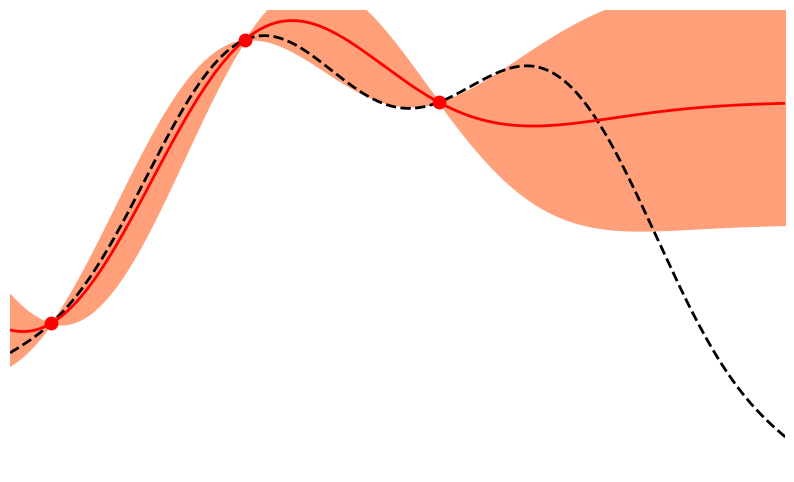

In [14]:
plot_current_gp(sm)

Define a plot function for inspecting the current GP fit so that we can compare the fit before and after active learning training.

In [6]:
# Additional imports for animation
import os
from PIL import Image
import io

In [7]:
def create_animation_gif(sm, niter=20, algorithm="bape", frame_dir="frames", gif_name="active_learning_animation.gif"):
    """
    Create an animated GIF showing the evolution of GP fit during active learning.
    """
    # Clear any existing frames
    if os.path.exists(frame_dir):
        for f in os.listdir(frame_dir):
            if f.endswith('.png'):
                os.remove(os.path.join(frame_dir, f))
    
    # Create initial frame
    fig = plot_current_gp(sm, save_frame=True, frame_dir=frame_dir, iteration=0)
    plt.close(fig)  # Close the specific figure
    plt.close('all')  # Close all figures as backup
    
    # Perform active learning and save frames
    for i in range(niter):
        sm.active_train(niter=1, algorithm=algorithm)
        
        # Create frame
        fig = plot_current_gp(sm, save_frame=True, frame_dir=frame_dir, iteration=i+1)
        plt.close(fig)  # Close the specific figure
        plt.close('all')  # Close all figures as backup
        
        print(f"Iteration {i+1}/{niter} complete")
    
    # # Create GIF from frames
    # frames = []
    # frame_files = sorted([f for f in os.listdir(frame_dir) if f.endswith('.png')])
    
    # for frame_file in frame_files:
    #     frame_path = os.path.join(frame_dir, frame_file)
    #     frames.append(Image.open(frame_path))
    
    # # Save as GIF with slower frame rate for better viewing
    # frames[0].save(
    #     gif_name,
    #     save_all=True,
    #     append_images=frames[1:],
    #     duration=800,  # 800ms per frame
    #     loop=0
    # )
    
    # print(f"Animation saved as {gif_name}")
    return gif_name

In [15]:
create_animation_gif(sm, niter=20, algorithm="bape", frame_dir="frames", gif_name="active_learning_animation.gif")

Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


Iteration 1/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00, 11.58it/s]


Iteration 2/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


Iteration 3/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  9.26it/s]


Iteration 4/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  9.98it/s]


Iteration 5/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00, 11.07it/s]


Iteration 6/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  9.67it/s]


Iteration 7/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00, 10.38it/s]


Iteration 8/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  7.86it/s]


Iteration 9/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  9.58it/s]


Iteration 10/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  7.76it/s]


Iteration 11/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00, 10.34it/s]


Iteration 12/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  6.67it/s]


Iteration 13/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  8.86it/s]


Iteration 14/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  9.49it/s]


Iteration 15/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  9.34it/s]


Iteration 16/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  8.27it/s]


Iteration 17/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Iteration 18/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


Iteration 19/20 complete
Running 1 active learning iterations using bape...


100%|██████████| 1/1 [00:00<00:00,  8.28it/s]

Optimized 4 hyperparameters: (0.015s)


Iteration 20/20 complete


'active_learning_animation.gif'

In [16]:
os.system("convert -delay 40 -loop 0 -dispose previous -units PixelsPerInch frames/*.png -density 300 active_learning_animation.gif")


0

In [20]:
import os
# Change ImageMagick resolution - resize to 50% of original size for smaller file
# os.system("convert -delay 40 -loop 0 -dispose previous -resize 50% frames/*.png active_learning_animation.gif")

# Alternative options:
# For specific pixel dimensions:
# os.system("convert -delay 40 -loop 0 -dispose previous -resize 800x600 frames/*.png active_learning_animation.gif")

# For higher quality but larger file:
os.system("convert -delay 40 -loop 0 -dispose previous -resize 150% frames/*.png active_learning_animation.gif")

# For lower quality but much smaller file:
# os.system("convert -delay 40 -loop 0 -dispose previous -resize 30% frames/*.png active_learning_animation.gif")

0

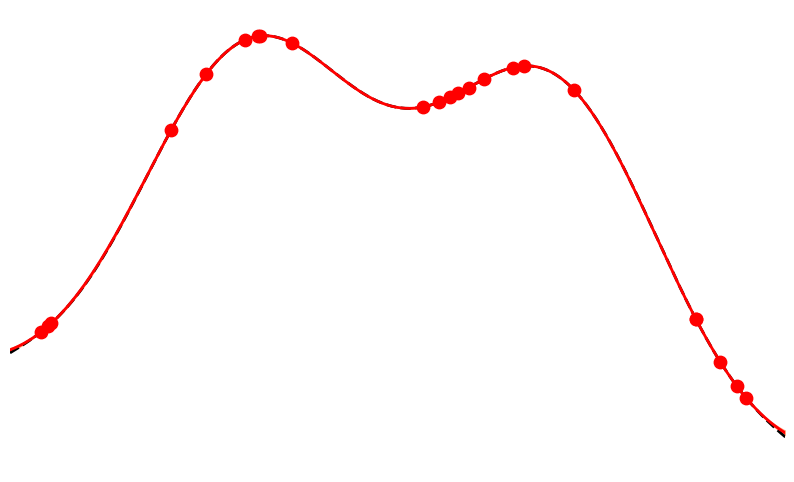

In [17]:
plot_current_gp(sm)

In [ ]:
# Create animated GIF showing active learning process
gif_filename = create_animation_gif(sm, niter=20, algorithm="bape", 
                                  frame_dir="frames", 
                                  gif_name="active_learning_evolution.gif")

print(f"Animation complete! Saved as: {gif_filename}")

Running 20 active learning iterations using bape...


 50%|█████     | 10/20 [00:00<00:00, 11.56it/s]

Optimized 4 hyperparameters: (0.012s)


100%|██████████| 20/20 [00:01<00:00, 11.69it/s]

Optimized 4 hyperparameters: (0.013s)
Caching model to results/test1d/surrogate_model...


## Animated Active Learning Process

The following animation shows how the Gaussian Process surrogate model evolves during active learning:

- **Top panel**: Shows the true function (black dashed), GP mean (red line), GP uncertainty (red shaded area), and training points (red dots)
- **Bottom panel**: Shows the acquisition functions (AGP in green, BAPE in blue) that guide where to sample next
- **Vertical dotted lines**: Indicate the optimal next sampling location according to each acquisition function

Watch how the GP progressively learns the true function shape and the acquisition functions adapt to focus on different regions as uncertainty is reduced.

In [ ]:
# Display the animation in the notebook
from IPython.display import Image as IPImage, display

# Display the GIF
display(IPImage(filename=gif_filename))

After 20 iterations the convergence is much better, particularly in the high likelihood regions which are most important for sampling.

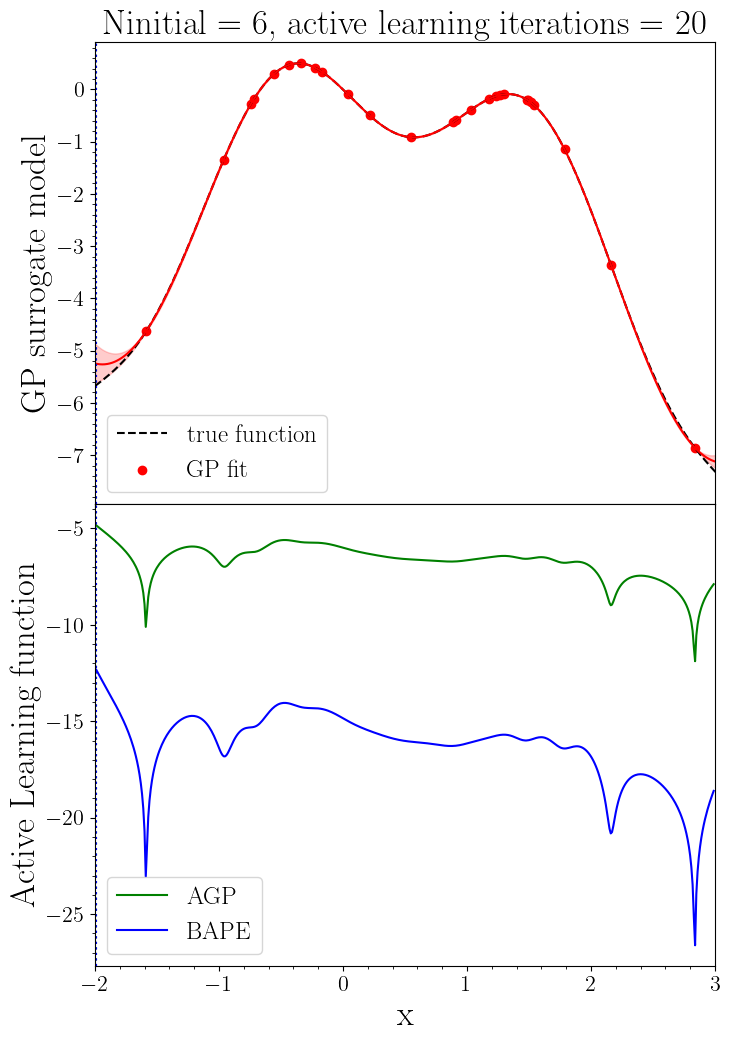

In [7]:
plot_current_gp(sm)